In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

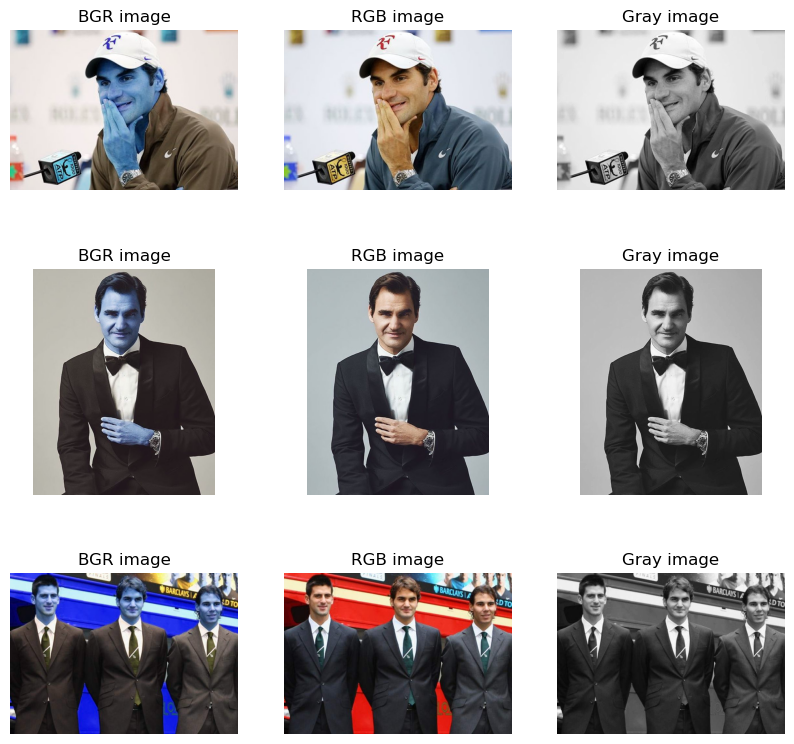

In [21]:
path_img_tests = [('./test_images/federer'+str(i)+'.jpg') for i in range(1,4)]
plt.figure(figsize=(10,10))
for i in range(1,4):
    img_test = cv2.imread(path_img_tests[i-1])
    plt.subplot(3,3,3*(i-1) + 1), plt.imshow(img_test)
    plt.title('BGR image')
    plt.axis('off') 
    img_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,3*(i-1) + 2), plt.imshow(img_rgb)
    plt.title('RGB image')
    plt.axis('off') 
    img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
    plt.subplot(3,3,3*(i-1) + 3), plt.imshow(img_gray, cmap = 'gray')
    plt.title('Gray image')
    plt.axis('off') 
plt.show()

In [22]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

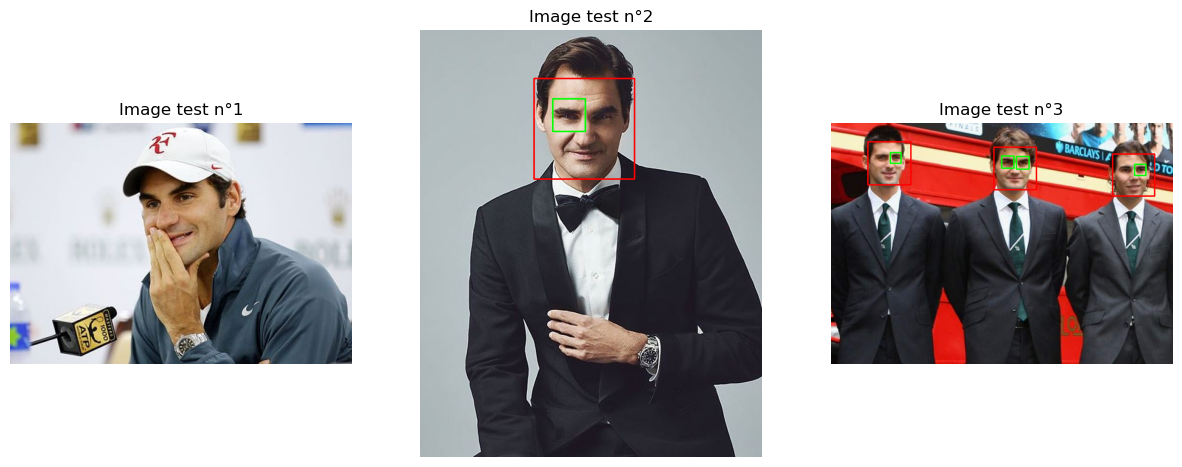

In [23]:
index_subplot=0
plt.figure(figsize=(15, 15))
for img_path in path_img_tests:
    index_subplot += 1
    image = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    face_img = img_rgb.copy()
    for (x,y,w,h) in face:
        face_img = cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_rgb = face_img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_rgb,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    plt.subplot(1,3,index_subplot), plt.imshow(face_img, cmap='gray')
    plt.axis('off')
    plt.title('Image test n°' + str(index_subplot))
plt.show()

In [24]:
def crop_faces_from_full_image(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cropped_images = []
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, scaleFactor=1.2, minNeighbors=5)
    if len(faces) == 0:
        return None

    for (x, y, w, h) in faces:
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img_rgb[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) > 0:
            cropped_images.append(roi_color)
    if len(cropped_images) == 0:
        return None
    
    return cropped_images

def save_cropped_image(image, count, name):
    cropped_images = crop_faces_from_full_image(image)
    if cropped_images is None:
        return
        
    output_dir = f'./images_dataset/cropped/{name}'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for index, face in enumerate(cropped_images):
        filename = os.path.join(output_dir, f'{count}_{index}.jpg')
        cv2.imwrite(filename, cv2.cvtColor(face, cv2.COLOR_RGB2BGR)) 

In [25]:
import shutil
path_cropped_data = './images_dataset/cropped/'
if os.path.exists(path_cropped_data):
    shutil.rmtree(path_cropped_data)
os.mkdir(path_cropped_data)

In [26]:
import os
img_dirs = []
for entry in os.scandir('./images_dataset/'):
    if entry.is_dir():
        if entry.path=='./images_dataset/cropped':
            pass
        else:
            img_dirs.append(entry.path)

In [27]:
print(img_dirs)

['./images_dataset/serena_williams', './images_dataset/roger_federer', './images_dataset/virat_kohli', './images_dataset/lionel_messi', './images_dataset/maria_sharapova']


In [28]:
img_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif']
for celebrity_dir in img_dirs:
    pict_index = 0
    cel_name = celebrity_dir.split('/')[-1]
    print('Cropping images of '+cel_name+' ...')
    if os.path.exists(path_cropped_data+cel_name):
        shutil.rmtree(path_cropped_data+cel_name)
    os.mkdir(path_cropped_data+cel_name)
    for file in os.scandir(celebrity_dir):
        if file.is_file():
            if os.path.splitext(file.name)[1].lower() in img_extensions:
                image = cv2.imread(file.path)
                save_cropped_image(image, pict_index, cel_name)
                pict_index+=1
            else:
              print(f'The extension used here ({os.path.splitext(file.name)[1].lower()}) is not suitable for the processing required to classify images.') 
print('Cropping done !')

Cropping images of serena_williams ...
Cropping images of roger_federer ...
Cropping images of virat_kohli ...
Cropping images of lionel_messi ...
Cropping images of maria_sharapova ...
Cropping done !


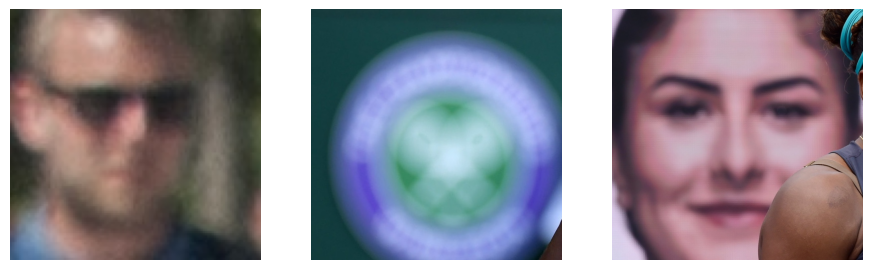

In [29]:
index_subplot = 0
plt.figure(figsize=(11, 11))
for outlier_ex in os.scandir('./outliers_examples'):
    index_subplot += 1
    im_out = cv2.imread(outlier_ex.path)
    im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,index_subplot), plt.imshow(im_out)
    plt.axis('off')
plt.show()

Outliers and duplicals removing

In [30]:
outliers_index_serena = ['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1']
outliers_index_roger = ['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1']
outliers_index_virat = ['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0']
outliers_index_lionel = ['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1']
outliers_index_maria = ['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0']

In [31]:
dict_outl = {
    'sw' :{
        'crop_folder_path':'./images_dataset/cropped/serena_williams',
        'outliers_index':['2_0','2_1','5_0','5_1','5_2','5_3','5_4','5_5','5_6','7_1','11_1','16_1','16_2','17_0','25_0','32_0','35_1','38_0','42_0','50_1','51_0','53_1','54_1','54_2','64_0','64_1']
        }, 
    'rf' :{
        'crop_folder_path':'./images_dataset/cropped/roger_federer',
        'outliers_index':['21_1','21_2','21_3','30_0','30_1','33_1','44_1','46_1']
        },
    'vk' :{
        'crop_folder_path':'./images_dataset/cropped/virat_kohli',
        'outliers_index':['16_1','20_1','26_0','34_0','35_0','35_1','36_1','55_0','72_0','78_0','96_0','99_0']
        },
    'lm' :{
        'crop_folder_path':'./images_dataset/cropped/lionel_messi',
        'outliers_index':['5_1','5_2','6_0','24_0','24_1','33_1','33_2','34_1','38_0','38_1','38_2','38_3','55_1']
        },
    'ms' :{
        'crop_folder_path':'./images_dataset/cropped/maria_sharapova',
        'outliers_index':['2_1','26_2','26_3','31_0','31_2','39_0','39_1','39_2','41_1','48_1','62_0']
        }
}
    

In [32]:
for athlete, dict_params in dict_outl.items():
    for index in dict_params['outliers_index']:
        os.remove(dict_params['crop_folder_path']+'/'+index+'.jpg')